# Ayudantía Árboles de Clasificación en R

In [42]:
library(repr)
options(repr.plot.width=5,repr.plot.height=3)

Antes de comenzar necesitamos instalar el paquete a utilizar para crear nuestros árboles de decisión, para esto utilizamos el siguiente comando desde la terminal de R:

~~~
install.packages("tree")
~~~
O si utilizar R Studio puedes instalarlo seleccionando _**Tools $\leftarrow$ Install Packages**_ en la barra de herramientas.

Una vez tenemos el Package instalado, lo importamos con el siguiente comando.

In [22]:
library(tree)

Para comenzar necesitamos cargar los datos que utilizaremos.

In [23]:
data <- read.table("DatosControl.csv",header=TRUE, sep=",")

Para Revisar los datos de una columna en particular, por ejemplo NotaFinal, se consulta de la siguiente manera.

~~~
data$NotaFinal
~~~


Por otro lado, podemos consultar la cantidad de datos por cada posible valor de una columna, por ejemplo la columna NotaFinal, que es la que nos interesa predecir.

In [24]:
xtabs(~ NotaFinal,data = data)

NotaFinal
 <55 >=55 
 325  545 

También podemos ver esta información en un gráfico de barras.

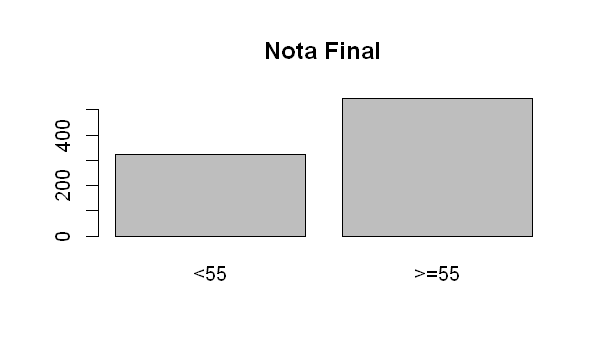

In [43]:
counts <- table(data$NotaFinal)
barplot(counts, main="Nota Final")

Como se ve, el número de datos por cada clase a predecir no es igual _**¿Qué problemas podría traer esto?**_

Por otro lado, tal como vieron en clases, necesitamos separar nuestro conjunto de datos en un subconjunto de entrenamiento y uno de pruebas _**¿Cuál es la importancia de este paso?**_

In [26]:
# Queremos obtener siempre lo mismo
set.seed(42)
# En este caso utilizaremos un conjunto de entrenamiento del 80% de los datos
train_size <- floor(0.80 * nrow(data))
train_mask <- sample(seq_len(nrow(data)),size = train_size)
# Separamos nuestros conjuntos
train <- data[train_mask, ]
test <- data[-train_mask, ]

Podemos ver la cantidad de datos que tienen nuestros conjuntos creados.

In [27]:
nrow(data)
nrow(train)
nrow(test)

[1] 870

[1] 696

[1] 174

Si revisamos la cantidad de datos por clase a predecir en el conjunto de pruebas, podemos ver la distribución de estas.

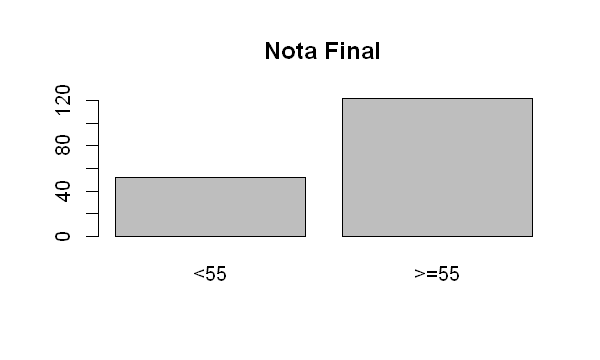

In [41]:
barplot(table(test$NotaFinal),main="Nota Final")

Con nuestros conjuntos separados podemos proceder a crear nuestro árbol de clasificación de la siguiente manera.

In [29]:
# Creamos el árbol
train.tree = tree(NotaFinal ~ Sexo + HorasEstudio + VTR + TiempoLibre + Carrete + Salud + Inasistencias, data=train)
# Y mostramos información sobre él
summary(train.tree)


Classification tree:
tree(formula = NotaFinal ~ Sexo + HorasEstudio + VTR + TiempoLibre + 
    Carrete + Salud + Inasistencias, data = train)
Variables actually used in tree construction:
[1] "VTR"           "Inasistencias" "TiempoLibre"  
Number of terminal nodes:  4 
Residual mean deviance:  1.156 = 800.2 / 692 
Misclassification error rate: 0.2744 = 191 / 696 

También podemos hacer un plot de nuestro árbol.

In [47]:
options(repr.plot.width=6,repr.plot.height=5)

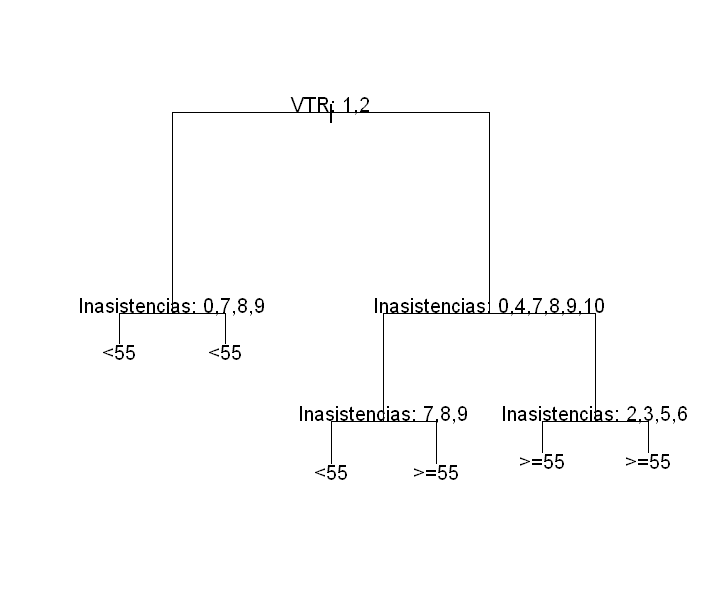

In [48]:
plot(train.tree)
text(train.tree,pretty = 1)

_**¿Notan algo raro?**_

Sí, pues se está tomando el VTR como variable continua cuando es una variable discreta, así que vamos a discretizar.

In [31]:
data$Inasistencias = as.factor(data$Inasistencias)
data$VTR = as.factor(data$VTR)
data$Sexo = as.factor(data$Sexo)
data$HorasEstudio = as.factor(data$HorasEstudio)
data$TiempoLibre = as.factor(data$TiempoLibre)
data$Carrete = as.factor(data$Carrete)
data$Salud = as.factor(data$Salud)

Con las variables ya discretizadas creamos nuestros conjuntos nuevamente.

In [32]:
# Queremos obtener siempre lo mismo
set.seed(42)
# En este caso utilizaremos un conjunto de entrenamiento del 80% de los datos
train_size <- floor(0.80 * nrow(data))
train_mask <- sample(seq_len(nrow(data)),size = train_size)
# Separamos nuestros conjuntos
train <- data[train_mask, ]
test <- data[-train_mask, ]

Y finalmente nuestro árbol de clasificación.

In [33]:
train.tree = tree(NotaFinal ~ Sexo + HorasEstudio + VTR + TiempoLibre + Carrete + Salud + Inasistencias, data=train)
summary(train.tree)


Classification tree:
tree(formula = NotaFinal ~ Sexo + HorasEstudio + VTR + TiempoLibre + 
    Carrete + Salud + Inasistencias, data = train)
Variables actually used in tree construction:
[1] "VTR"           "Inasistencias"
Number of terminal nodes:  6 
Residual mean deviance:  1.101 = 759.8 / 690 
Misclassification error rate: 0.2744 = 191 / 696 

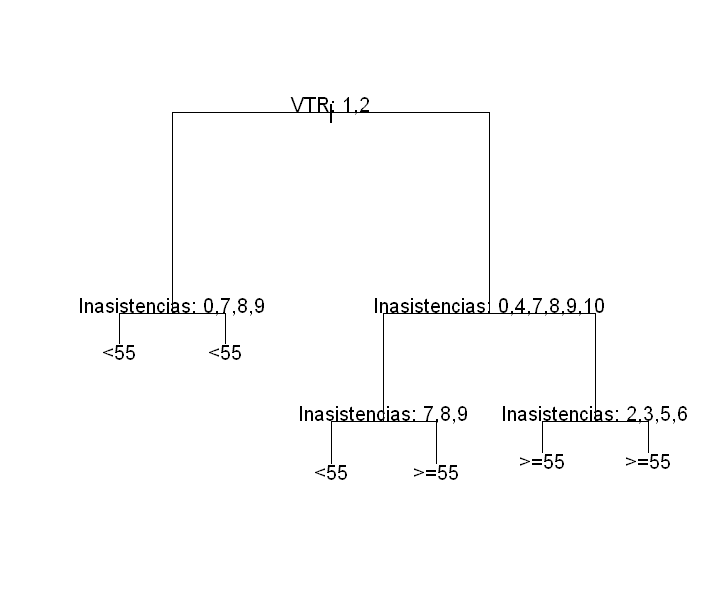

In [49]:
plot(train.tree)
text(train.tree, pretty = 1)

Con el siguiente comando podemos ver el árbol nodo a nodo.

In [35]:
train.tree$frame

,var,n,dev,yval,splits,yprob
,<fct>,<dbl>,<dbl>,<fct>,"<chr[,2]>","<dbl[,2]>"
1,VTR,696,932.27826,>=55,":bc , :a","0.3922414, 0.6077586"
2,Inasistencias,113,119.43458,<55,":ahij , :bcdefgk","0.7787611, 0.2212389"
4,<leaf>,40,15.88122,<55,",","0.9500000, 0.0500000"
5,<leaf>,73,90.97204,<55,",","0.6849315, 0.3150685"
3,Inasistencias,583,728.55881,>=55,":aehijk, :bcdfg","0.3173242, 0.6826758"
6,Inasistencias,292,401.28405,>=55,":hij , :aek","0.4452055, 0.5547945"
12,<leaf>,35,37.62811,<55,",","0.7714286, 0.2285714"
13,<leaf>,257,346.08953,>=55,",","0.4007782, 0.5992218"
7,Inasistencias,291,282.13888,>=55,":cdfg , :b","0.1890034, 0.8109966"


In [36]:
train.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 696 932.30 >=55 ( 0.3922 0.6078 )  
   2) VTR: 1,2 113 119.40 <55 ( 0.7788 0.2212 )  
     4) Inasistencias: 0,7,8,9 40  15.88 <55 ( 0.9500 0.0500 ) *
     5) Inasistencias: 1,2,3,4,5,6,10 73  90.97 <55 ( 0.6849 0.3151 ) *
   3) VTR: 0 583 728.60 >=55 ( 0.3173 0.6827 )  
     6) Inasistencias: 0,4,7,8,9,10 292 401.30 >=55 ( 0.4452 0.5548 )  
      12) Inasistencias: 7,8,9 35  37.63 <55 ( 0.7714 0.2286 ) *
      13) Inasistencias: 0,4,10 257 346.10 >=55 ( 0.4008 0.5992 ) *
     7) Inasistencias: 1,2,3,5,6 291 282.10 >=55 ( 0.1890 0.8110 )  
      14) Inasistencias: 2,3,5,6 262 269.30 >=55 ( 0.2099 0.7901 ) *
      15) Inasistencias: 1 29   0.00 >=55 ( 0.0000 1.0000 ) *

Sabemos que este árbol tiene un error de clasificación de 0.2744 _**en entrenamiento**_, veamos como se comporta en el conjunto de pruebas. Para esto, creemos una matriz de confusión.

In [37]:
# Predecimos los valores del conjunto de test utilizando nuestro árbol
pred = predict(train.tree,test,type="class")
# Creamos nuestra matriz de confusión
conf_matrix <- with(test,table(pred,test$NotaFinal))
conf_matrix

      
pred   <55 >=55
  <55   25   20
  >=55  27  102

Luego calculamos el Classification Error

In [38]:
acc <- sum(diag(conf_matrix))/nrow(test)
miss_class <- 1 - acc
miss_class

[1] 0.2701149